In [49]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

In [50]:
df=pd.read_csv("C:/Users/raghav/OneDrive/Desktop/MLOPS krish naik/salary prdiction/data/salary_train.csv")

In [51]:
df.head()

,ID,education_level,years_experience,job_title,industry,location,company_size,certifications,age,working_hours,crucial_code,salary
0,1,High School,12.0,Data Scientist,Education,New York,Medium,1.0,48.0,52.0,XEV156,NaN
1,2,PhD,17.0,Data Scientist,IT,New York,NaN,0.0,39.0,34.0,NaN,NaN
2,3,PhD,12.0,Software Engineer,Education,New York,Large,4.0,NaN,42.0,FIK684,95136.09799
3,4,Bachelors,1.0,Analyst,Healthcare,New York,Small,2.0,34.0,NaN,DKD155,70682.30628
4,5,High School,0.0,Analyst,IT,New York,Small,1.0,38.0,40.0,ZZH645,64887.65469


In [52]:
""" mamipulating data in dataset"""
df.drop(df[["ID","crucial_code"]],inplace=True,axis=1)

In [53]:
df

,education_level,years_experience,job_title,industry,location,company_size,certifications,age,working_hours,salary
0,High School,12.0,Data Scientist,Education,New York,Medium,1.0,48.0,52.0,NaN
1,PhD,17.0,Data Scientist,IT,New York,NaN,0.0,39.0,34.0,NaN
2,PhD,12.0,Software Engineer,Education,New York,Large,4.0,NaN,42.0,95136.09799
3,Bachelors,1.0,Analyst,Healthcare,New York,Small,2.0,34.0,NaN,70682.30628
4,High School,0.0,Analyst,IT,New York,Small,1.0,38.0,40.0,64887.65469
...,...,...,...,...,...,...,...,...,...,...
10995,Masters,11.0,Data Scientist,Healthcare,San Francisco,Medium,4.0,58.0,36.0,NaN
10996,PhD,4.0,NaN,Finance,Bangalore,Small,1.0,30.0,58.0,68231.00794
10997,Bachelors,12.0,Data Scientist,Finance,San Francisco,Medium,0.0,31.0,52.0,96753.22060
10998,Masters,3.0,Manager,Healthcare,San Francisco,Large,2.0,50.0,32.0,98773.40580


In [54]:
for i in df.keys():
    print(f"{i} : {df[i].unique()} ")
    print()

education_level : ['High School' 'PhD' 'Bachelors' 'Masters' nan] 

years_experience : [12. 17.  1.  0.  6. 11.  8.  3.  2. 13. 15. 18.  5. 14. 10.  9. 16. nan
  4. 19.  7.] 

job_title : ['Data Scientist' 'Software Engineer' 'Analyst' 'Manager' nan] 

industry : ['Education' 'IT' 'Healthcare' 'Finance' nan] 

location : ['New York' 'London' 'Bangalore' 'San Francisco'] 

company_size : ['Medium' nan 'Large' 'Small'] 

certifications : [ 1.  0.  4.  2.  3. nan] 

age : [48. 39. nan 34. 38. 35. 40. 45. 28. 30. 55. 49. 36. 41. 23. 32. 26. 59.
 58. 54. 43. 52. 47. 22. 57. 29. 50. 51. 27. 42. 37. 46. 31. 24. 33. 56.
 53. 25. 44.] 

working_hours : [52. 34. 42. nan 40. 37. 43. 49. 51. 30. 35. 36. 48. 50. 59. 55. 33. 53.
 41. 56. 44. 58. 39. 31. 38. 57. 47. 32. 54. 46. 45.] 

salary : [        nan 95136.09799 70682.30628 ... 96753.2206  98773.4058
 68906.12689] 



In [55]:
df['education_level'] = df['education_level'].fillna(df['education_level'].mode()[0])
df['age'] = df['age'].fillna(df['age'].median())
df['years_experience'] = df['years_experience'].fillna(df['years_experience'].median())
df['certifications'] = df['certifications'].fillna(df["certifications"].median())
df['job_title'] = df['job_title'].fillna("other")
df['industry'] = df['industry'].fillna(df['industry'].mode()[0])
df['company_size'] = df['company_size'].fillna(df['company_size'].mode()[0])
df['working_hours'] = df['working_hours'].fillna(df['working_hours'].mode()[0])
df['salary'] = df['salary'].fillna(df['salary'].mean())


In [56]:
dict={}

In [57]:
for i in df.keys():
    dict[i] = df[i].unique()
dict
pickle.dump(dict,open("data.pkl","wb"))

In [61]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
ss=StandardScaler()
df["education_level"]=le.fit_transform(df["education_level"])
df["industry"]=le.fit_transform(df["industry"])
df["location"]=le.fit_transform(df["location"])
df["job_title"]=le.fit_transform(df["job_title"])
df["company_size"]=le.fit_transform(df["company_size"])
df["age"]=ss.fit_transform(df[["age"]])
df["working_hours"]=ss.fit_transform(df[["working_hours"]])

pickle.dump(le,open("label_encode.pkl","wb"))
pickle.dump(ss,open("standard_scaler.pkl","wb"))

In [59]:
df

,education_level,years_experience,job_title,industry,location,company_size,certifications,age,working_hours,salary
0,1,12.0,1,0,2,1,1.0,0.680911,0.907574,86407.37073
1,3,17.0,1,3,2,1,0.0,-0.159688,-1.224802,86407.37073
2,3,12.0,3,0,2,0,4.0,0.027111,-0.277080,95136.09799
3,0,1.0,0,2,2,2,2.0,-0.626688,-0.395545,70682.30628
4,1,0.0,0,3,2,2,1.0,-0.253088,-0.514010,64887.65469
...,...,...,...,...,...,...,...,...,...,...
10995,2,11.0,1,2,3,1,4.0,1.614910,-0.987872,86407.37073
10996,3,4.0,4,1,0,2,1.0,-1.000287,1.618366,68231.00794
10997,0,12.0,1,1,3,1,0.0,-0.906887,0.907574,96753.22060
10998,2,3.0,2,2,3,0,2.0,0.867710,-1.461733,98773.40580


In [62]:
x=df[["education_level",	'years_experience',	'job_title','industry',	'location',	'company_size','certifications',"age",	"working_hours"]]
y=df[["salary"]]
from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [67]:
from sklearn.ensemble import VotingRegressor,RandomForestRegressor,GradientBoostingRegressor
rf=RandomForestRegressor()
gb=GradientBoostingRegressor()
vr=VotingRegressor(estimators=[("rf",rf),("gb",gb)])
vr.fit(xtrain,ytrain)
ypred=vr.predict(xtest)
pickle.dump(vr,open("regressor.pkl","wb"))



c:\Users\raghav\OneDrive\Desktop\MLOPS krish naik\venv\lib\site-packages\sklearn\ensemble\_voting.py:698: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error
r2=r2_score(ytest,ypred)
mae=mean_absolute_error(ytest,ypred)
print(r2,mae)

0.665082157232055 6943.337856194868


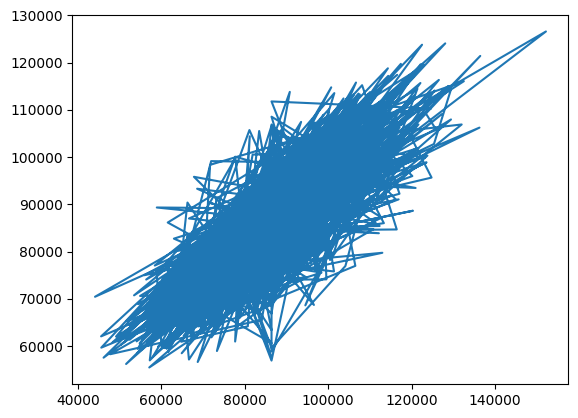

In [27]:
plt.plot(ytest,ypred)